In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [36]:
df = pd.read_csv('insurance.csv')

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df.sex = le.fit_transform(df.sex)
df.region = le.fit_transform(df.region)
df.smoker = le.fit_transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [43]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Data Visualization


<Figure size 600x600 with 0 Axes>

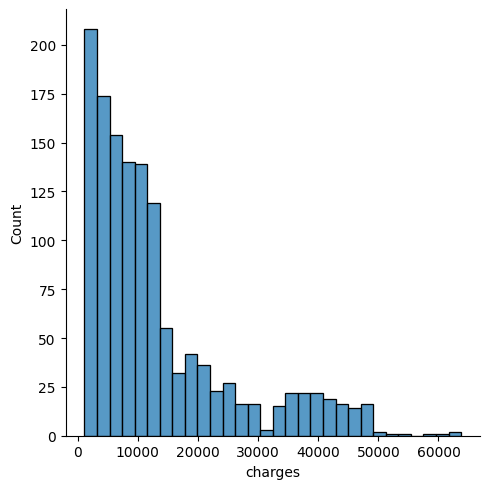

In [45]:
plt.figure(figsize=(6,6))
sns.displot(df['charges'])

<Axes: >

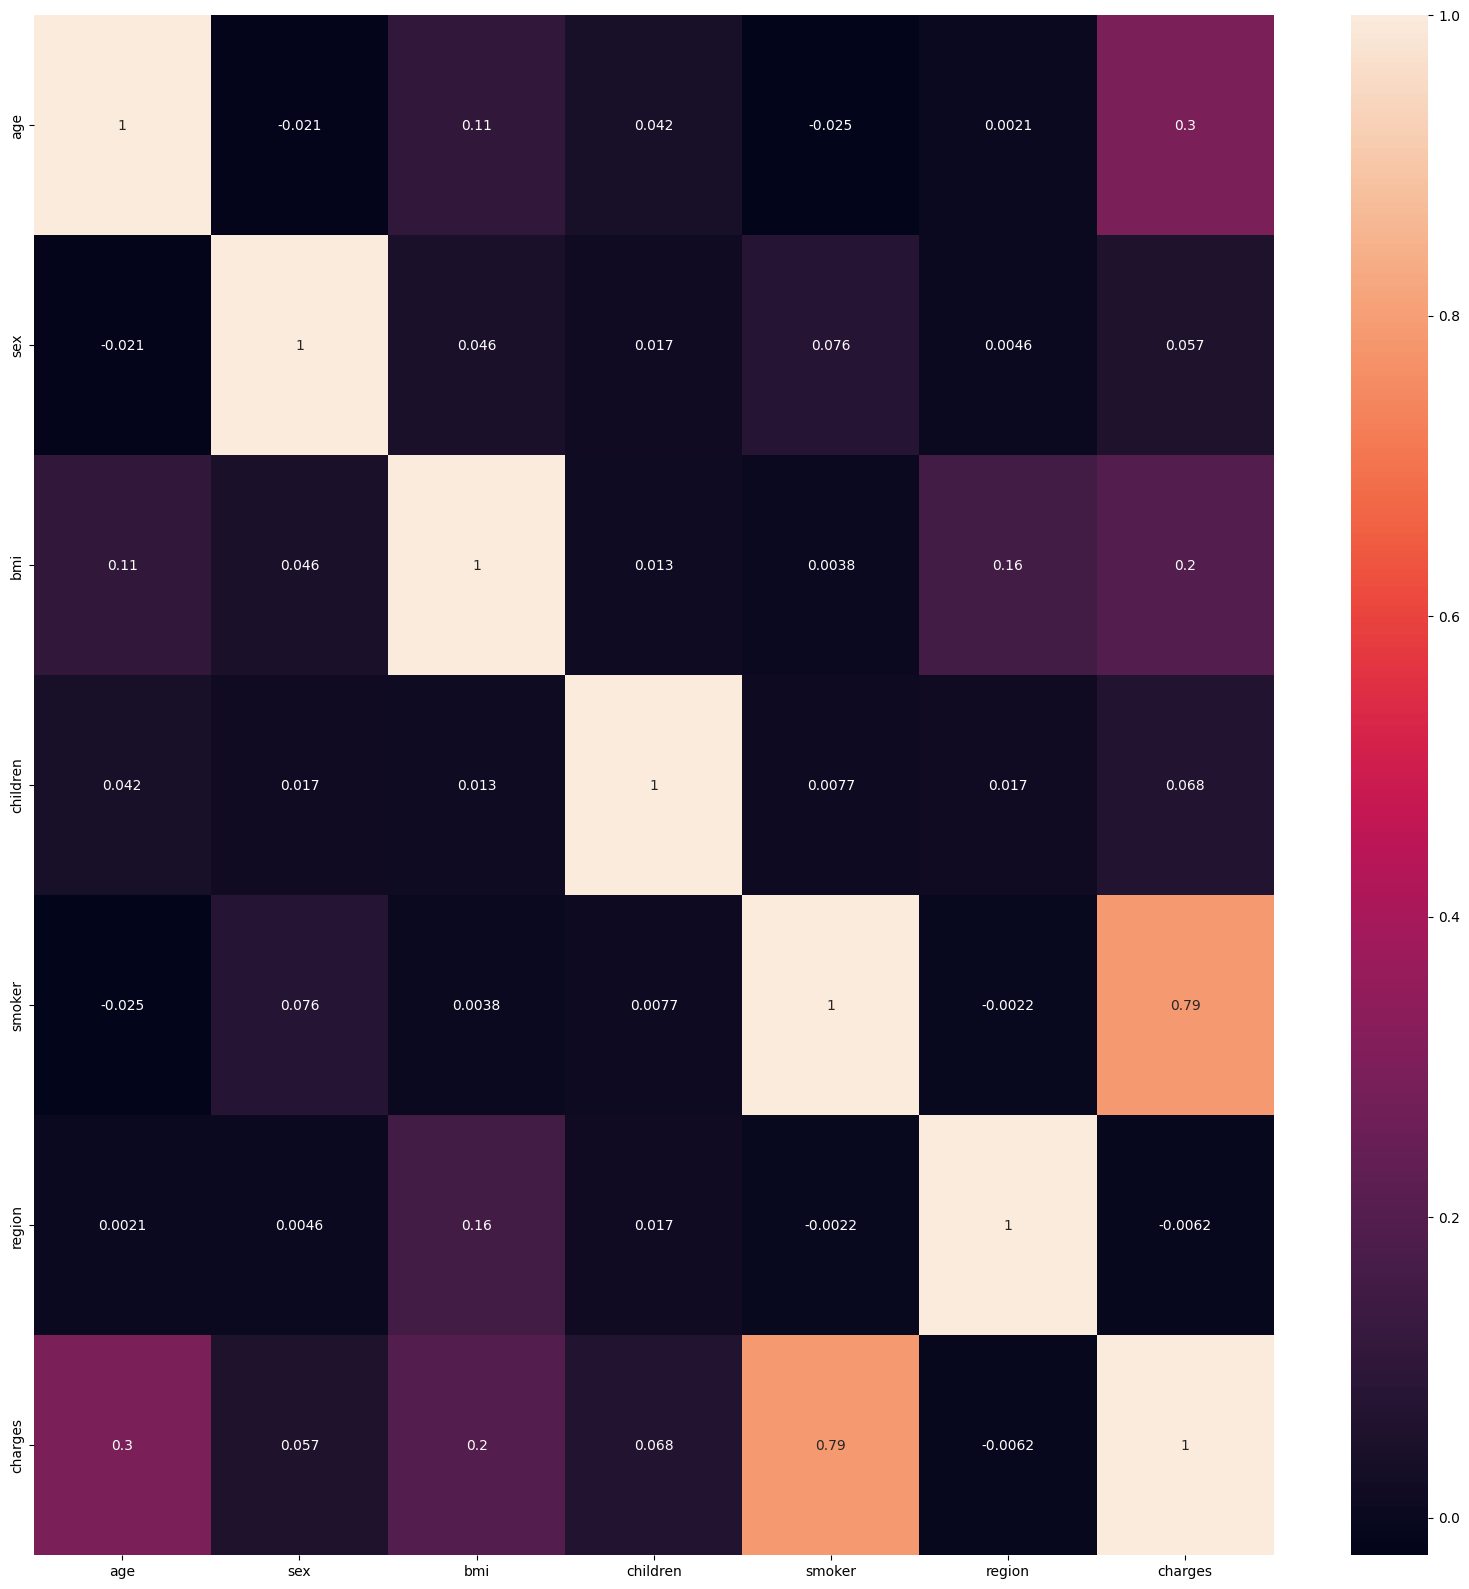

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [47]:
x = df.drop('charges',axis=1)
y = df['charges']

In [48]:
from sklearn.model_selection import train_test_split as tts

In [49]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=75)

In [50]:
xtrain.head()

,age,sex,bmi,children,smoker,region
622,49,0,21.300,1,0,3
353,33,1,35.245,0,0,0
644,43,1,35.310,2,0,2
249,29,1,28.975,1,0,0
201,48,0,32.230,1,0,2


In [51]:
ytrain.head()

622     9182.17000
353    12404.87910
644    18806.14547
249     4040.55825
201     8871.15170
Name: charges, dtype: float64

In [52]:
xtest.head()

,age,sex,bmi,children,smoker,region
1307,32,1,28.120,4,1,1
654,59,0,35.200,0,0,2
1169,37,0,34.105,1,0,1
570,31,0,29.100,0,0,3
633,40,1,22.705,2,0,0


Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [54]:
pred = reg.predict(xtest)
pred

array([31444.06893581, 14125.69501709,  9240.5726831 ,  4559.04252052,
        7183.72418412, 38744.86304769, 13446.77689492,  9856.65470611,
       15777.65382695, 11655.99769109, 26880.9741966 ,  1911.16287523,
        6974.23727621,  7044.49363856,  4042.5546189 , 15516.73107203,
        5601.91557466,  9159.42937416, 10633.66817197, 35177.24577315,
       10652.67177954, 29619.92122683,  6571.92857134, 16169.95169686,
       11668.17053811, 12553.04555765,  2211.88420256,  8913.68420521,
       24566.43601531, 14280.81985329,  9411.68724442, 11932.64513819,
        2996.73260665,  1124.26602325,  7143.76131851,  6321.14407209,
       25435.94791017,  5993.59595954,  3167.45584352,  2174.23947868,
       10306.9043735 , 15774.58005196, 11572.5560884 , 10983.33328085,
       12165.53932123,  4140.3261382 , 11149.98087558, 11679.22607504,
        9756.69901721, 37937.75740311,  6029.68650089, 28196.93280529,
        6341.91875818, 14064.9584735 , 11666.53289888,  5992.11598085,
      

In [55]:
m = reg.coef_
m

array([  255.32831486,  -242.25126446,   321.46363629,   627.57177544,
       23763.63362835,  -456.53149918])

In [56]:
c = reg.intercept_
c

-11341.132558579611

In [57]:
reg.score(xtest,ytest)

0.7666007875414489

In [58]:
accuracy = r2_score(ytest,pred)
accuracy

0.7666007875414489

In [59]:
mse1 = mean_squared_error(ytest,pred)
mse1

34746319.11938304

In [60]:
mae1 = mean_absolute_error(ytest,pred)
mae1

4077.181341788025

KNN Regression

In [62]:
from sklearn.neighbors import KNeighborsRegressor
ne = KNeighborsRegressor()
ne.fit(xtrain,ytrain)

KNeighborsRegressor()

In [63]:
kntest = ne.predict(xtest)
kntest

array([ 8664.09844 , 15255.108632, 18696.1259  , 10149.99584 ,
        8534.747238, 30252.510626, 11672.87961 , 12202.93632 ,
       30789.473982, 11161.91254 ,  7940.6352  , 11011.9515  ,
        6332.76192 ,  5033.66309 ,  1304.81414 , 13812.379518,
        4164.02026 , 23301.250576,  4697.72498 , 15862.29854 ,
       16619.632168, 16778.26969 , 33077.005538, 13327.74536 ,
        7177.89792 ,  9360.27332 ,  8865.255098, 11729.95667 ,
       10914.64652 , 11920.7072  , 17369.425912,  9835.601   ,
        5904.4587  ,  7748.8528  ,  7441.47195 , 13739.255704,
        2851.83831 ,  5077.1376  ,  3323.50765 ,  9928.051718,
       12219.30099 , 27401.48308 ,  5773.89555 ,  9933.03874 ,
       13960.05581 ,  9367.25582 , 18274.057666, 14488.1022  ,
       16516.71699 , 27786.459294,  7050.05487 ,  7356.93182 ,
       11125.84747 , 11823.19868 , 11490.82638 ,  4309.61116 ,
       10222.3906  ,  4097.79823 , 21480.615578,  9732.5132  ,
        8373.83023 ,  7804.381406,  8815.01347 , 13851.

In [70]:
accuracy1 = r2_score(ytest,kntest)
accuracy1

0.14238605193126064

In [68]:
mse2 = mean_squared_error(ytest,kntest)
mse2

127673643.82655035

In [69]:
mae2 = mean_absolute_error(ytest,kntest)
mae2

7719.262611340796

In [79]:
data = {'Name':['KNN-R_mae','KNN-R_mse','KNN-R_accuracy','LR_mae','LR_mse','LR_accuracy'],
         'Accuracy':[mae2,mse2,accuracy1,mae1,mse1,accuracy]}
df_for_barplot = pd.DataFrame(data=data)
df_for_barplot.head(6)

,Name,Accuracy
0,KNN-R_mae,7.719263e+03
1,KNN-R_mse,1.276736e+08
2,KNN-R_accuracy,1.423861e-01
3,LR_mae,4.077181e+03
4,LR_mse,3.474632e+07
5,LR_accuracy,7.666008e-01


<Axes: xlabel='Accuracy', ylabel='Name'>

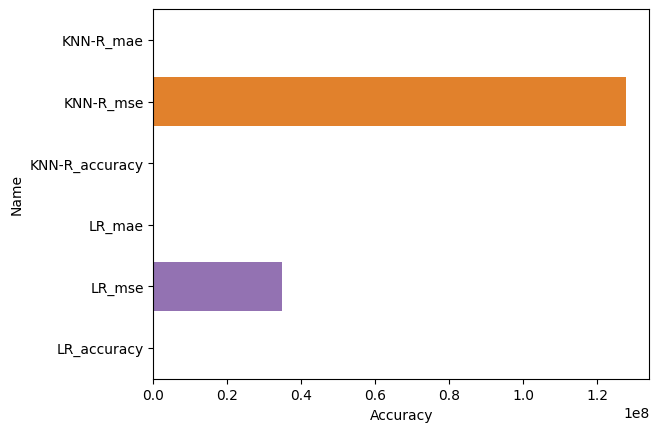

In [76]:
sns.barplot(x='Accuracy',y='Name',data=df_for_barplot)